# Replica project

## Creating a topology of artworks from the Cini Foundation Fototeca

### The data

The Cini Foundation possesses 300,000 cardboards containing the photograph of artworks and some metadata. These have been digitized as part of the Replica project and are now available in IIIF format.

The artworks span 12th-20th century, with most artworks being between 1400-1699. The artworks are mostly from Venician artists and most are Italian/European.

In [57]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
from IPython.display import Image
import numpy as np
import networkx as nx
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
metadata = pd.read_csv(path + 'Cini_20210811.csv', sep=';')
metadata.head(5)

/tmp/ipykernel_1409723/3894140588.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(path + 'Cini_20210811.csv', sep=';')


Drawer ImageNumber               Author  \
0     1A           1  ALLEGRINI Francesco   
1     1A           2     BAROCCI Federico   
2     1A           3      BASSANO Leandro   
3     1A           4     CAMPIGLI Massimo   
4     1A           5      CARRACCI A attr   

                                         Description        AuthorOriginal  \
0            tca con penna acquarellata 148 x 203 mm  ALLEGRINI, Francesco   
1  Studio di figura penna acquarellata (carboncin...     BAROCCI, Federico   
2              Scene penna su carta blu 171 x 219 mm      BASSANO, Leandro   
3  Ragazza su una scala gessetto su carta bruna g...     CAMPIGLI, Massimo   
4                 Madonna e Santi penna 291 x 205 mm    CARRACCI, A. attr.   

        AuthorULANLabel      AuthorULAN  \
0  Allegrini, Francesco  ulan:500115272   
1     Barocci, Federico  ulan:500115210   
2      Bassano, Leandro  ulan:500015945   
3     Campigli, Massimo  ulan:500029770   
4                   NaN             NaN   

                                    AuthorURL  AuthorComplemented  \
0  http://vocab.getty.edu/page/ulan/500115272                   0   
1  http://vocab.getty.edu/page/ulan/500115210                   0   
2  http://vocab.getty.edu/page/ulan/500015945                   0   
3  http://vocab.getty.edu/page/ulan/500029770                   0   
4                                         NaN                   1   

  AuthorComplement  ...  AuthorDeath AuthorBirthLong AuthorBirthLat  \
0    No complement  ...       1690.0             NaN            NaN   
1    No complement  ...       1612.0       12.633333      43.716667   
2    No complement  ...       1622.0       11.733333      45.766667   
3    No complement  ...       1971.0       13.400000      52.516667   
4             attr  ...          NaN             NaN            NaN   

  AuthorDeathLong AuthorDeathLat     AuthorBirthCity AuthorDeathCity  \
0             NaN            NaN                 NaN             NaN   
1       12.633333      43.716667              Urbino          Urbino   
2       12.326667      45.438611  Bassano del Grappa          Venice   
3        6.639811      43.269316              Berlin             Var   
4             NaN            NaN                 NaN             NaN   

                                uid  \
0  253993c139284a45be233a13121ddeeb   
1  1323356994c24635a11fdcd9d5f9284a   
2  a4268385f6384e61a3dd092bc6b8c083   
3  550f368cdb4442aab4d5e2ada702d6ad   
4  6047de5547b643cb87491be925748bee   

                                        CardboardURL  \
0  https://dhlabsrv4.epfl.ch/iiif_cini/1A%2F1A_1....   
1  https://dhlabsrv4.epfl.ch/iiif_cini/1A%2F1A_2....   
2  https://dhlabsrv4.epfl.ch/iiif_cini/1A%2F1A_3....   
3  https://dhlabsrv4.epfl.ch/iiif_cini/1A%2F1A_4....   
4  https://dhlabsrv4.epfl.ch/iiif_cini/1A%2F1A_5....   

                                            ImageURL  
0  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...  
1  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...  
2  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...  
3  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...  
4  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...  

[5 rows x 37 columns]

In [3]:
metadata['uid'].nunique(), metadata.shape

(329480, (330002, 37))

In [4]:
# dropping duplicates

metadata = metadata.groupby('uid').first().reset_index()

In [5]:
# taking, for example, a subset of the data
titian_data = metadata[metadata['AuthorOriginal'].fillna('').str.startswith('TIZIANO')]
titian_data.shape

(2265, 37)

The image url allows to retrieve the image from the IIIF source.

In [6]:
example_url = titian_data.reset_index()['ImageURL'][0]

print(example_url)
display(Image(url=example_url, width=200, height=200))

https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F1C%2F1C_484.jpg/full/full/0/default.jpg


#### Data loader for model?

### The morphograph

The morphograph is an annotated graph containing sets of two images that are considered similar according to the definition that they share a similar visual or physical trait. Where is this set stored? 

#### Data loader for this set?

In [7]:
# in jeanne's code
import pickle

with open(path + 'save_link_data_2018_08_02.pkl', 'rb') as f:
    morpho_graph_complete = pickle.load(f)

# contains uid	img1	img2	type	annotated
morpho_graph_complete.head()

uid                              img1  \
0  0f84770be893475581bebd8c0ce95704  4b6e5a18012e4974a43f6f652c9cad78   
1  5ade49fc2dc649b9947496a41e2decdb  384b9f017d5f43ba9dcfd92f2af830c4   
2  bf4d99eaf7da4bd486f9007c90c177a5  94fe74bcebf9442fb5cd9a0327590a84   
3  b29ec3c83c5641f9b6afadb2409b6746  922fe92d61e744b1a9462c848a916bcf   
4  ab27b55997b94bef9cca122829e9f64d  94fe74bcebf9442fb5cd9a0327590a84   

                               img2      type                        annotated  
0  e3329a91a266412fb1a0975d70894178  POSITIVE 2017-07-19 15:02:50.997512+00:00  
1  e3329a91a266412fb1a0975d70894178  POSITIVE 2017-07-19 15:02:51.238615+00:00  
2  726f47fb5bd94c5db8069334cc58020e  POSITIVE 2017-07-20 12:18:23.705228+00:00  
3  726f47fb5bd94c5db8069334cc58020e  POSITIVE 2017-07-20 12:18:24.021703+00:00  
4  922fe92d61e744b1a9462c848a916bcf  POSITIVE 2017-07-20 12:18:23.873097+00:00

In [8]:
morpho_graph_complete['type'].value_counts() # does positive mean similar?

DUPLICATE        114283
POSITIVE           6293
NON-DUPLICATE        60
PROPOSAL             27
Name: type, dtype: int64

In [9]:
morpho_graph_complete['uid'].nunique(), morpho_graph_complete.shape

(120663, (120663, 5))

In [25]:
positives = get_train_test_split(metadata, morpho_graph_complete)

In [35]:
positives.to_csv('data.csv')

In [36]:
from urllib.request import urlretrieve

urlretrieve(positives['ImageURL'][0], 'image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x7f945f5b00d0>)

In [37]:
#for i in range(positives.shape[0]):
#    urlretrieve(positives['ImageURL'][i], positives['set'][i]+'/'+positives['uid'][i]+'.jpg')

theoretically, the morphograph is a graph indicating the order of similarity and representing different connected components which are then used as training validation and test set, where is the original graph? Is this information retained in the above file?

## Testing similarity metrics

In [112]:
from PIL import Image
from torch import nn
import torchvision.models as models
from tqdm import tqdm

efficientnet_b7 = models.efficientnet_b7(pretrained=True, progress=False)

# remove last fully-connected layer
new_classifier = nn.Sequential(*list(efficientnet_b7.classifier.children())[:-4])
efficientnet_b7.classifier = new_classifier

In [165]:
dict2emb = {}

uniques = positives.groupby('uid').first().reset_index()
print(uniques.shape)

for i in tqdm(uniques.iterrows()):
    dict2emb[i[1]['uid']] = get_embedding(i[1]['uid'], i[1]['set'], efficientnet_b7)


with open('dict2emb', 'wb') as outfile:
    pickle.dump(dict2emb, outfile)

(1342, 45)


1342it [07:37,  2.94it/s]


In [166]:
positives = pd.read_csv('data.csv')

with open('dict2emb', 'rb') as infile:
    dict2emb = pickle.load(infile)
 
embds = pd.Series(dict2emb, name='embedding')
positives = positives.merge(embds, left_on='uid', right_index=True).reset_index().drop(columns=['level_0','Unnamed: 0', 'index'])
positives.head(5)

uid Drawer  ImageNumber             Author  \
0  00a59b7eb3ae41af81d3ccaaedb2007c   111B          407  CALVAERT Dionisio   
1  00a59b7eb3ae41af81d3ccaaedb2007c   111B          407  CALVAERT Dionisio   
2  00a59b7eb3ae41af81d3ccaaedb2007c   111B          407  CALVAERT Dionisio   
3  00a59b7eb3ae41af81d3ccaaedb2007c   111B          407  CALVAERT Dionisio   
4  00a59b7eb3ae41af81d3ccaaedb2007c   111B          407  CALVAERT Dionisio   

                         Description       AuthorOriginal  AuthorULANLabel  \
0  Gesù Cristo flagellato. 150 x 67.  CALVAERT, Dionisio.  Calvaert, Denys   
1  Gesù Cristo flagellato. 150 x 67.  CALVAERT, Dionisio.  Calvaert, Denys   
2  Gesù Cristo flagellato. 150 x 67.  CALVAERT, Dionisio.  Calvaert, Denys   
3  Gesù Cristo flagellato. 150 x 67.  CALVAERT, Dionisio.  Calvaert, Denys   
4  Gesù Cristo flagellato. 150 x 67.  CALVAERT, Dionisio.  Calvaert, Denys   

       AuthorULAN                                   AuthorURL  \
0  ulan:500020043  http://vocab.getty.edu/page/ulan/500020043   
1  ulan:500020043  http://vocab.getty.edu/page/ulan/500020043   
2  ulan:500020043  http://vocab.getty.edu/page/ulan/500020043   
3  ulan:500020043  http://vocab.getty.edu/page/ulan/500020043   
4  ulan:500020043  http://vocab.getty.edu/page/ulan/500020043   

   AuthorComplemented  ...                                       CardboardURL  \
0                   0  ...  https://dhlabsrv4.epfl.ch/iiif_cini/111B%2F111...   
1                   0  ...  https://dhlabsrv4.epfl.ch/iiif_cini/111B%2F111...   
2                   0  ...  https://dhlabsrv4.epfl.ch/iiif_cini/111B%2F111...   
3                   0  ...  https://dhlabsrv4.epfl.ch/iiif_cini/111B%2F111...   
4                   0  ...  https://dhlabsrv4.epfl.ch/iiif_cini/111B%2F111...   

                                            ImageURL  \
0  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
1  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
2  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
3  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
4  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   

                     uid_connection                              img1  \
0  ce05436e935b43c8b7d12ffaefb48258  00a59b7eb3ae41af81d3ccaaedb2007c   
1  508a0027b571486db1c9e491ba57cbe5  00a59b7eb3ae41af81d3ccaaedb2007c   
2  3d7c3002b7ab4e578523e2ee841f6f0e  00a59b7eb3ae41af81d3ccaaedb2007c   
3  a7db2db1cc1f4834929db29f57413494  00a59b7eb3ae41af81d3ccaaedb2007c   
4  74c1b5407c5e49eaa42d7c48db3324ae  f8b45489dcef4df68d6fda9ff43751dc   

                               img2      type  \
0  f3e82c61520b4dacbf0877cca837a9af  POSITIVE   
1  f557c587e3444eaeb20f2d55e55e510d  POSITIVE   
2  a15f8efc3926415da7727b63ab819ee5  POSITIVE   
3  c06f6643acc244a2bc4cf5983d44b78a  POSITIVE   
4  00a59b7eb3ae41af81d3ccaaedb2007c  POSITIVE   

                          annotated cluster    set  \
0  2018-03-03 19:31:18.737972+00:00     133  train   
1  2018-03-03 19:31:18.746547+00:00     133  train   
2  2018-03-03 19:31:18.759602+00:00     133  train   
3  2018-03-03 19:31:18.848352+00:00     133  train   
4  2018-03-03 19:31:18.702976+00:00     133  train   

                                           embedding  
0  [[0.004269556], [0.007946168], [0.028986877], ...  
1  [[0.004269556], [0.007946168], [0.028986877], ...  
2  [[0.004269556], [0.007946168], [0.028986877], ...  
3  [[0.004269556], [0.007946168], [0.028986877], ...  
4  [[0.004269556], [0.007946168], [0.028986877], ...  

[5 rows x 45 columns]

In [174]:
tree = make_tree(positives)

reference image e7db4731e0a34029832505f7a6f4ccb1


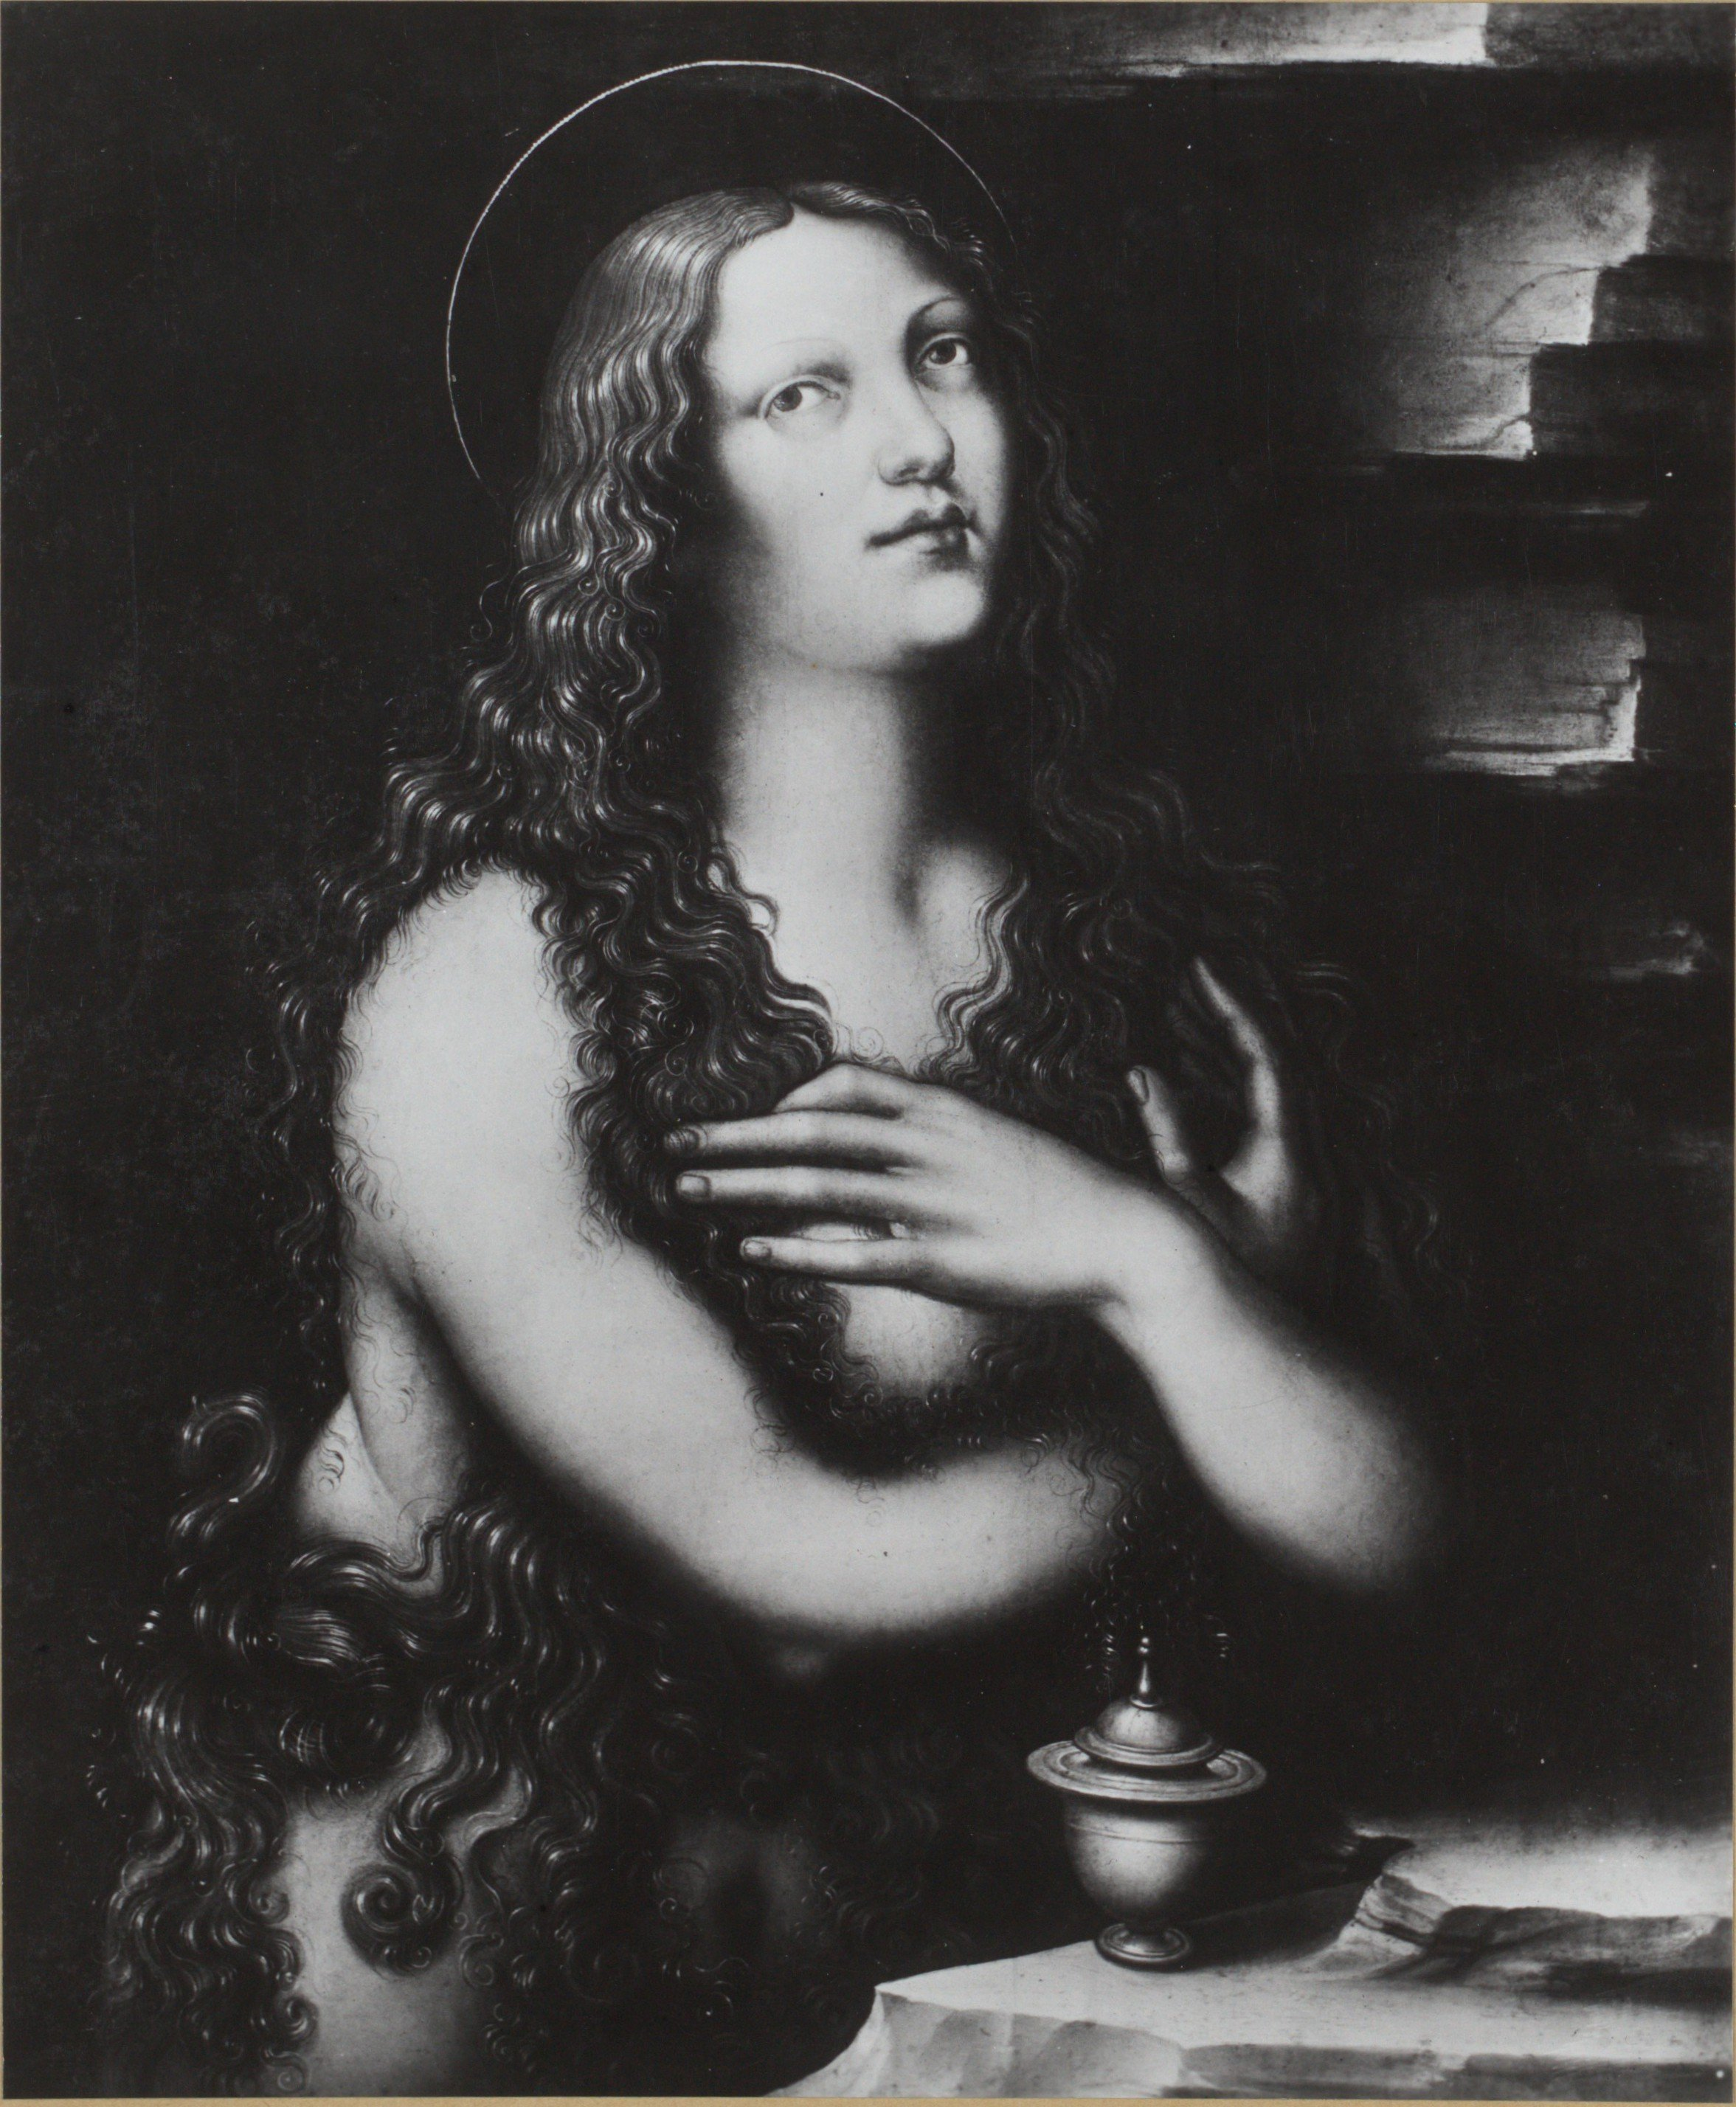

actual most similar image 8fdef90f049b413b8ac06d76112d9d03


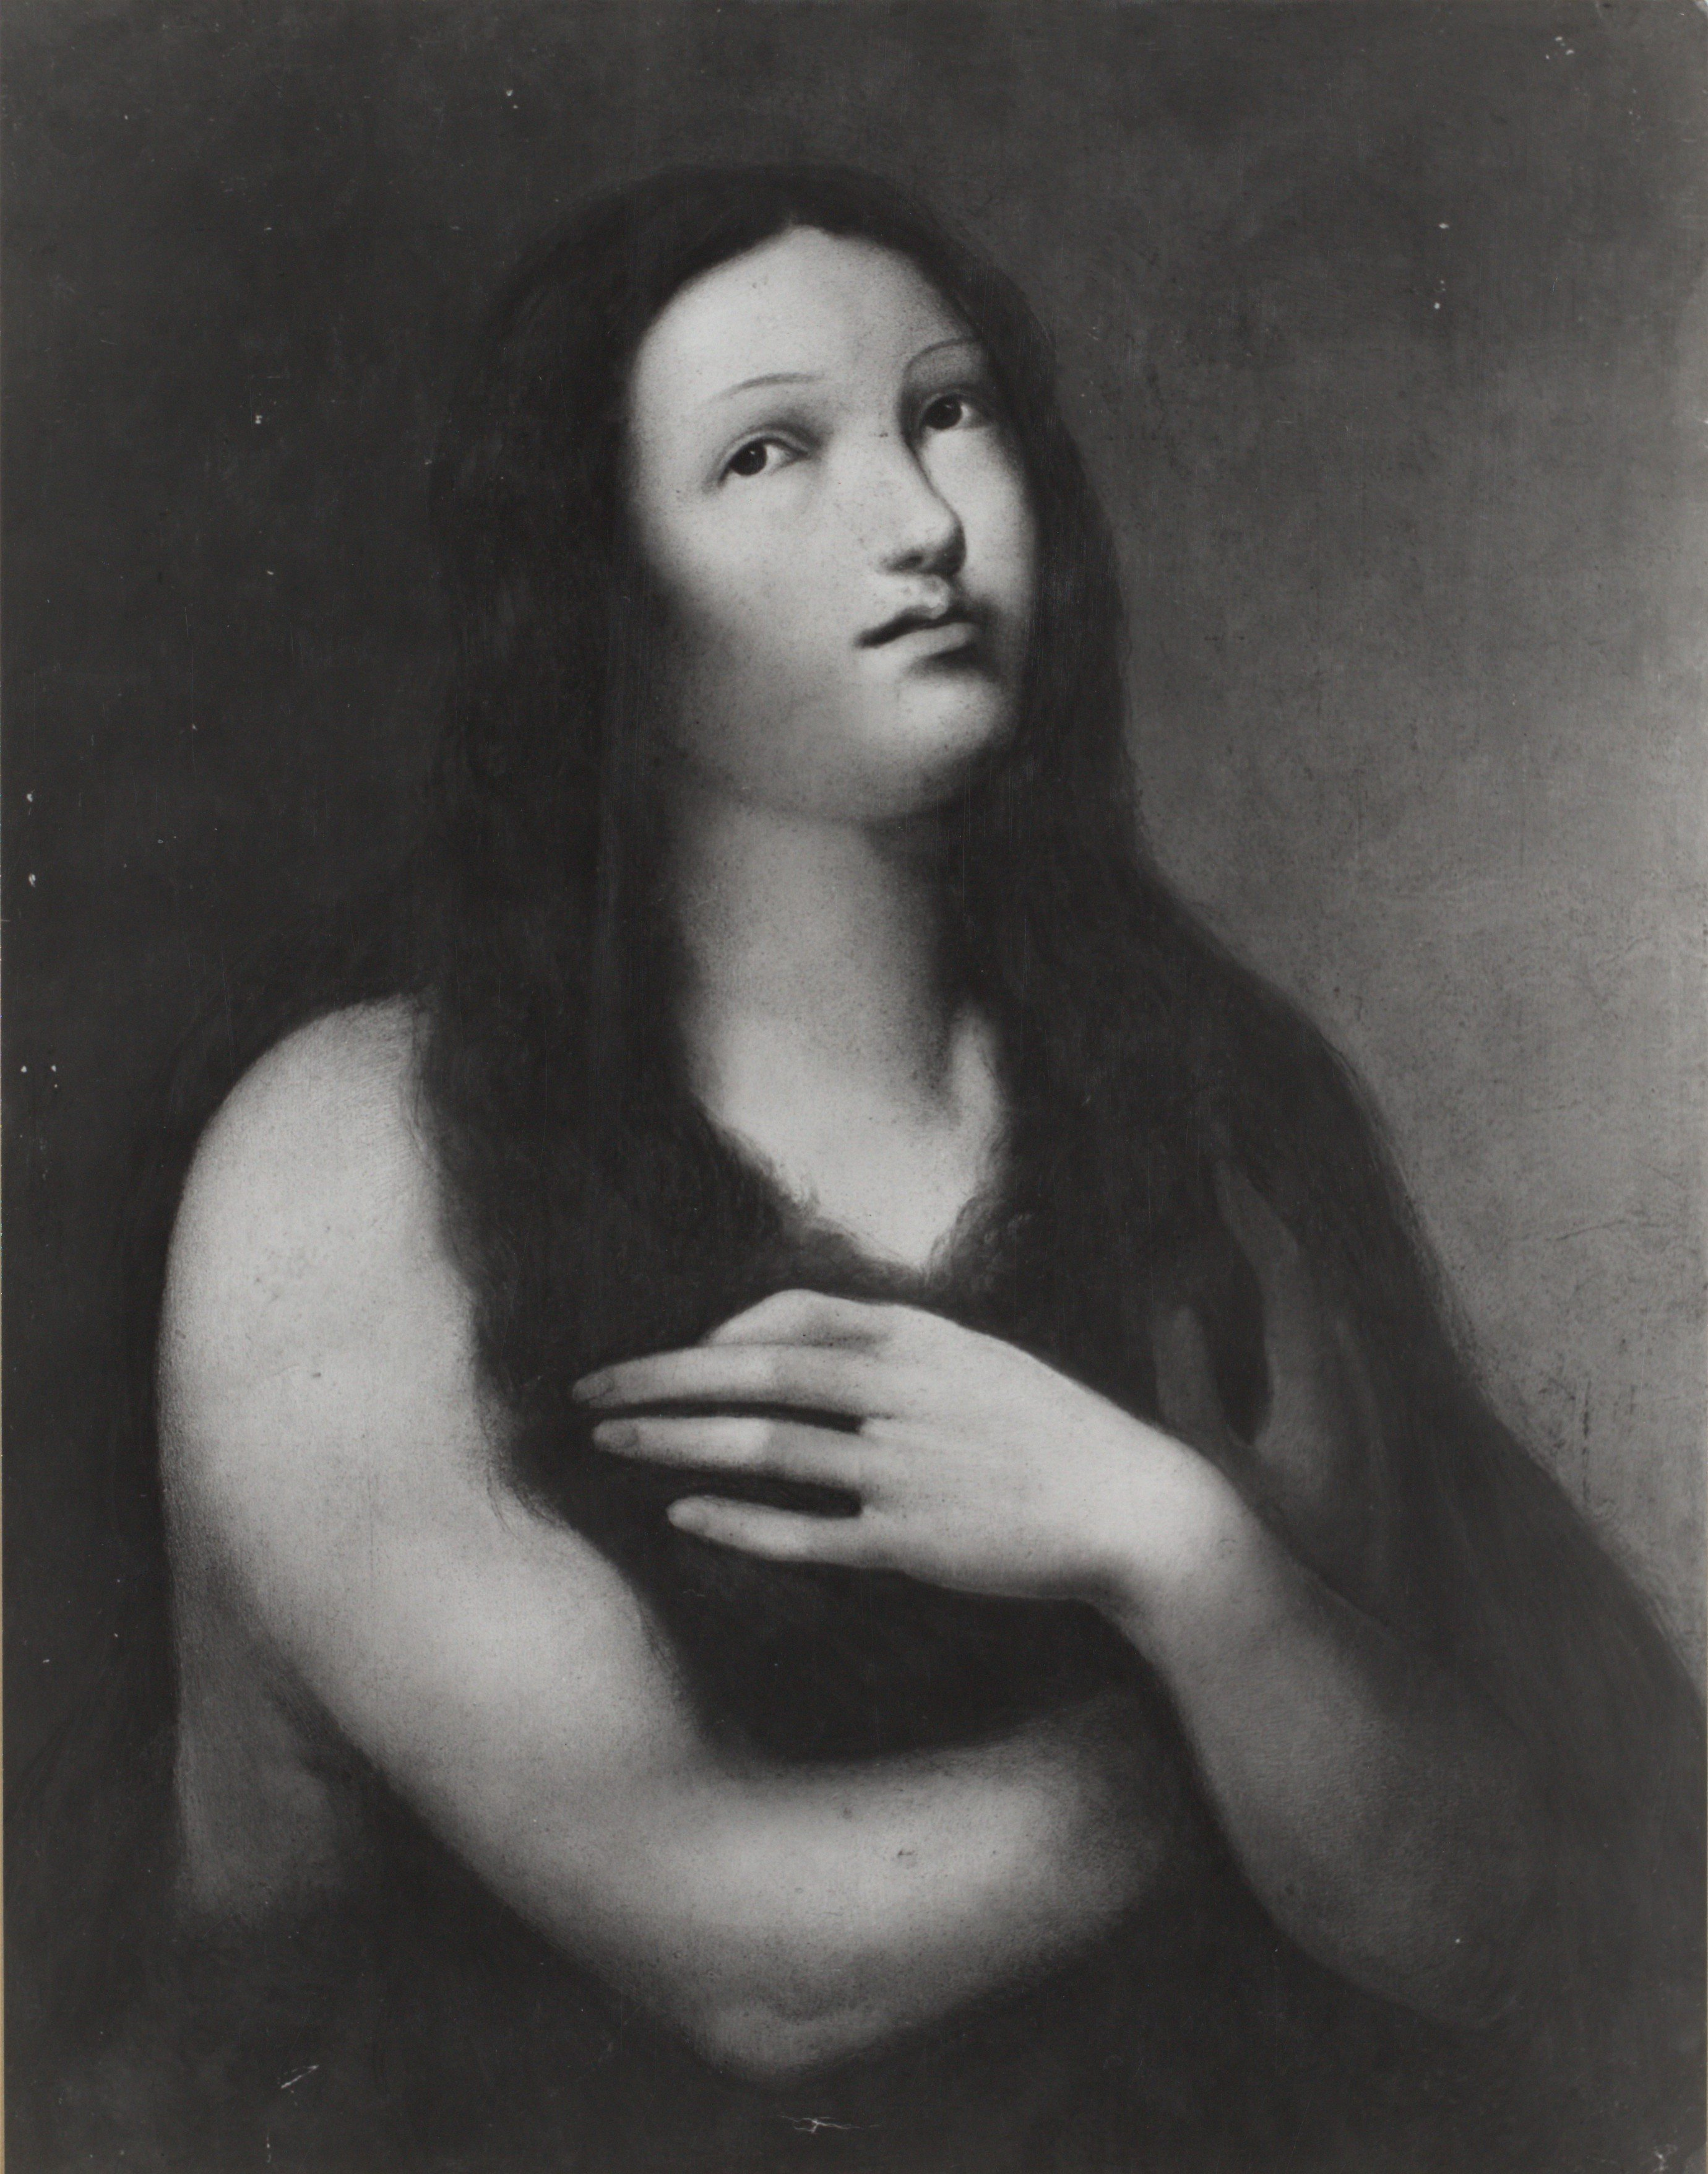

most similar image according to model 4aa5bd43f1664bca9eacea85b7abc370


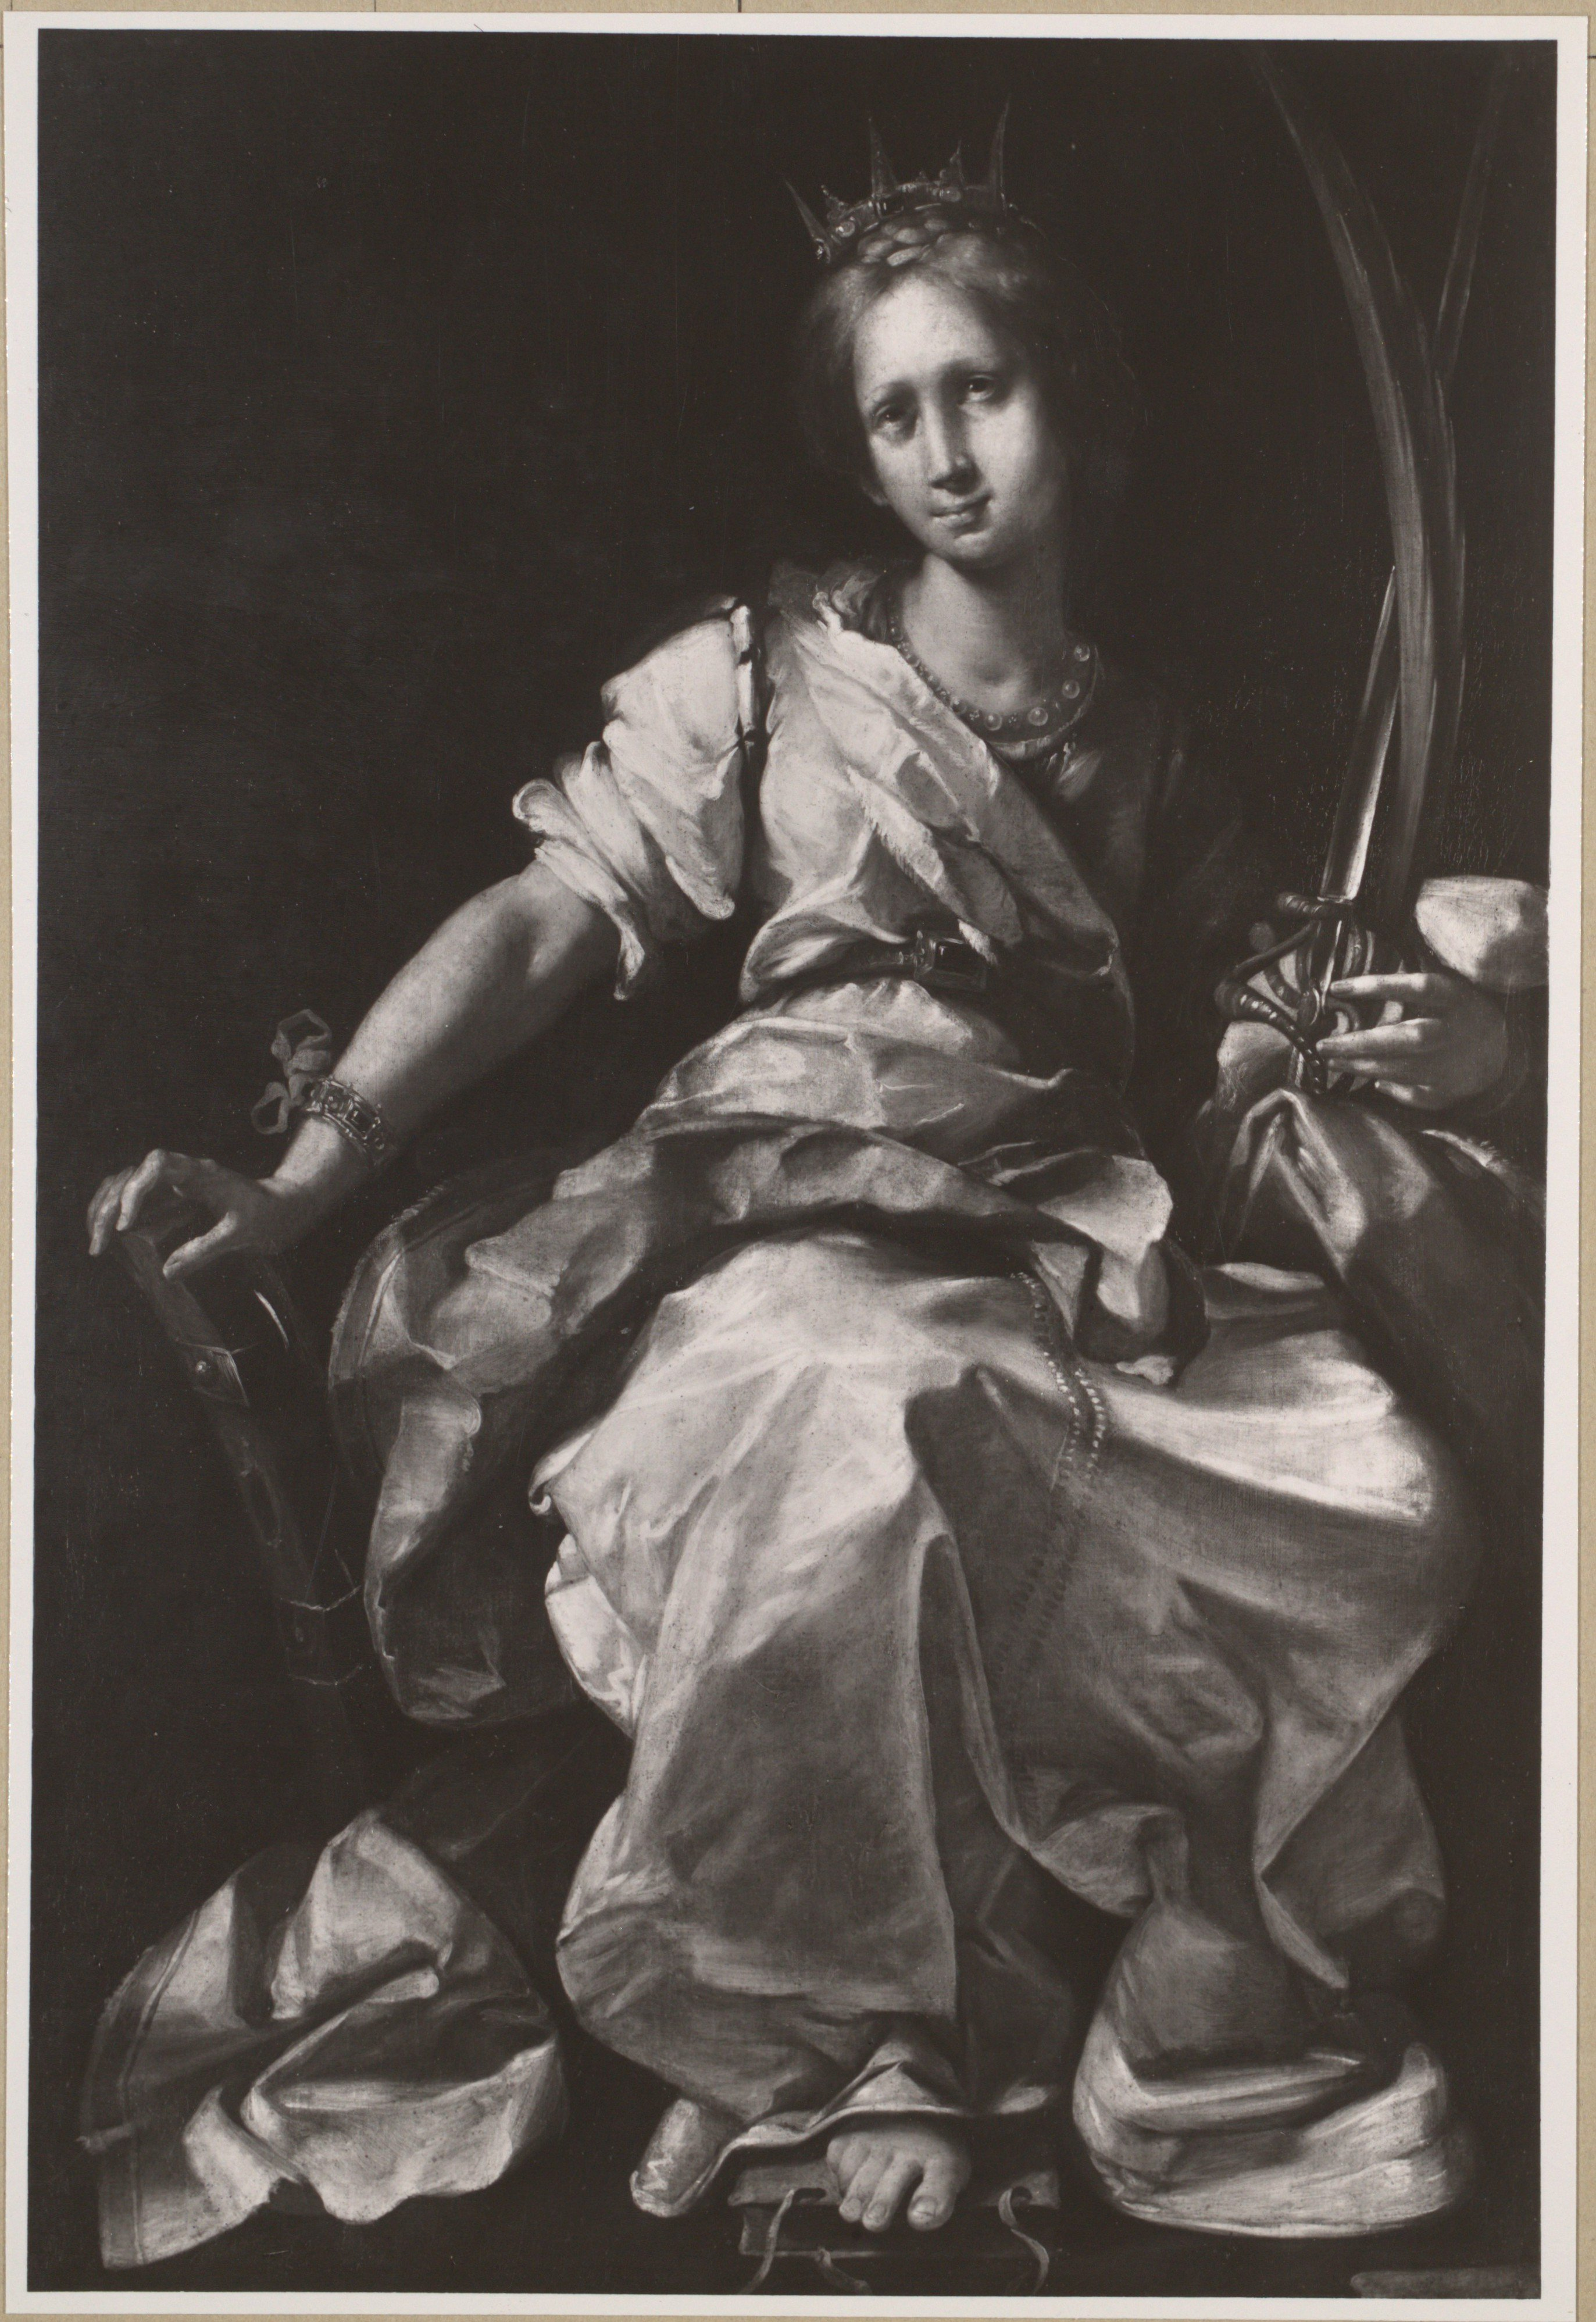

In [183]:
show_most_similar(positives[positives['set'] == 'train'].sample(), positives, tree)

In [207]:
positives[positives['set'] == 'train'].reset_index().drop(columns=['embedding']).to_csv('train.csv')

### Model

According to Seguin (2016), the model to find similar images is obtained using the loss:

l(A,B,C) --> l(A,B) < l(B,C)

where A is the input image, B is the morphograph ground truth, C is an image that is considered similar by a pre-trained model.

So the steps are:

Model 1: e.g. any well performing model from https://pytorch.org/vision/stable/models.html, give all images in the data and obtain embedding (i.e. last CNN layer) of all of them. Compute most similar embeddings to the embeddings of the images in the morphograph.

Model 2: fine tune the model with the loss above. The model should stop at the embedding layer.


However, since the parameters of the similarity function s are updated
during the training process, so does the set of hard triplets. Thus, we need to iteratively mine
hard-triplets, and optimize the function s, as shown by the following pseudo-code:
Require: Initial similarity function s, collection C , morphograph G
1: for n = 1..Number of training epochs do
2: index ← BUILDSEARCHINDEX(C , s)
3:Ai ,Bi ,Ci 	← SAMPLEHARDTRIPLETS(G,index)
4: s← OPTIMIZESIMILARITYFUNCTION(s,  Ai ,Bi ,Ci i )
5: end for

#### Is the loss and training defined somewhere?

page 109 of pdf:

Δi = s(Ai, Bi) − s(Ai,Ci) > 0

Hinge Loss : 

lm(Δi) = max(0, m−Δi)

Final loss:

L = sumi lm(Δi )

#### Can we improve this? i.e. another loss, more finetuning layers on artworks?


https://neptune.ai/blog/pytorch-loss-functions 


In [216]:
from dataloader import *

dt = ReplicaDataset('train.csv', 'dict2emb', 'train')

In [220]:
#dt.__getitem__(70)

Store final weights of the finetuned model for prediction.

Evaluation:
- metrics introduced by Seguin (2016), in replica_search.train_retrieval

### Topological Data Analysis

Since we wish to map the space of images so that the similar ones are close in space and that we can show a structure of such similarities, we use the **mapper** algorithm to find such structure and substructures.

Input: the embeddings of the images
TDA
Output: skeleton of the space, clusters

Evaluation: use the clusters and the closeness of the clusters in the skeleton to evaluate the structure.
Based on: morphohraph, predictions of the model based on different inputs.

In [ ]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/scripts')

#from Mapper_Tools_Repl import MapperGraph
import kmapper as km

mat_cini = np.load(path + 'Replica_UIDs_ResNet_VGG_All.npy', allow_pickle=True)
mat_cini.shape


(329480, 3)

### Visualize the results

Using Flask, improve the visualization of the results.

### More:

#### Can we compare the process to a similar process on the metadata?
#### Do the clusters / structure of clusters mirror what we already know?